In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
'''Funções que serão utilizadas para testar os diferentes algoritmos'''
def func(l):
    x = l[0]
    y = l[1]
    return np.array(10*(x)**2 + 13*np.sin(3*y)+ 15*np.cos(3*x) + y**2)

def der_func(l):
    x=l[0]
    y=l[1]
    return np.array([20*x + (-45*np.sin(3*x)), 39*np.cos(3*y) + 2*y])
es_func = func([X,Y])

def ackley(coor, a=20, b=0.2, c=2 * np.pi):
    x=coor[0]
    y=coor[1]
    f = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(
        c * x) + np.cos(c * y))) + a + np.exp(1)
    return np.array(f)

def der_ackley(coor, a=20, b=0.2, c=2 * np.pi):
    x=coor[0]
    y=coor[1]
    df_dx = a * b * x * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2))) / np.sqrt(
        0.5 * (x**2 + y**2)) + 0.5 * c * np.sin(c * x) * np.exp(0.5 * (np.cos(
            c * x) + np.cos(c * y)))
    df_dy = a * b * y * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2))) / np.sqrt(
        0.5 * (x**2 + y**2)) + 0.5 * c * np.sin(c * y) * np.exp(0.5 * (np.cos(
            c * x) + np.cos(c * y)))
    return np.array([df_dx, df_dy])
es_ackley = ackley([X,Y])

def himmelblau(coor):
    x=coor[0]
    y=coor[1]
    f = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
    return np.array(f)

def der_himmelblau(coor):
    x=coor[0]
    y=coor[1]
    df_dx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    df_dy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([df_dx, df_dy])
es_himmelblau = himmelblau([X,Y])

def levy(coor):
    x=coor[0]
    y=coor[1]
    w = 1 + (x - 1) / 4
    f = np.sin(np.pi * w)**2 + (w - 1)**2 * (1 + np.sin(2 * np.pi * y)**2) + (
        w - 1)**2 * (1 + np.sin(2 * np.pi * x)**2)
    return np.array(f)

def dev_levy(coor):
    x=coor[0]
    y=coor[1]
    w = 1 + (x - 1) / 4
    df_dx = 2 * (w - 1) * np.sin(2 * np.pi * x) * np.cos(2 * np.pi * x) + (
        np.pi * np.cos(np.pi * w) * (w - 1)) / 2
    df_dy = 2 * (w - 1) * np.sin(2 * np.pi * y) * np.cos(
        2 * np.pi * y) + 2 * np.pi * (w - 1) * np.sin(2 * np.pi * y) * np.cos(
            2 * np.pi * y)
    return np.array([df_dx, df_dy])
es_levy = levy([X,Y])

# Função usada para plotar as funções otimizadas
def plot(pnt_func, pnt_ackley, pnt_levy, pnt_himmelblau):
    figure, axis = plt.subplots(2, 2, figsize=(10,10)) 

    fig1 = axis[0,0].contourf(X, Y, es_func, 10, cmap='magma')
    axis[0,0].set_title('func')
    axis[0,0].plot(pnt_func[0], pnt_func[1], "o", color='white')
    figure.colorbar(fig1, ax=axis[0,0])

    fig2 = axis[1,0].contourf(X, Y, es_ackley, 10, cmap='magma')
    axis[1,0].set_title('ackley')
    axis[1,0].plot(pnt_ackley[0], pnt_ackley[1], "o", color='white')
    figure.colorbar(fig2, ax=axis[1,0])

    fig3 = axis[0,1].contourf(X, Y, es_levy, 10, cmap='magma')
    axis[0,1].set_title('levy')
    axis[0,1].plot(pnt_levy[0], pnt_levy[1], "o", color='white')
    figure.colorbar(fig3, ax=axis[0,1])

    fig4 = axis[1,1].contourf(X, Y, es_himmelblau, 10, cmap='magma')
    axis[1,1].set_title('himmelblau')
    axis[1,1].plot(pnt_himmelblau[0], pnt_himmelblau[1], "o", color='white')
    figure.colorbar(fig4, ax=axis[1,1])

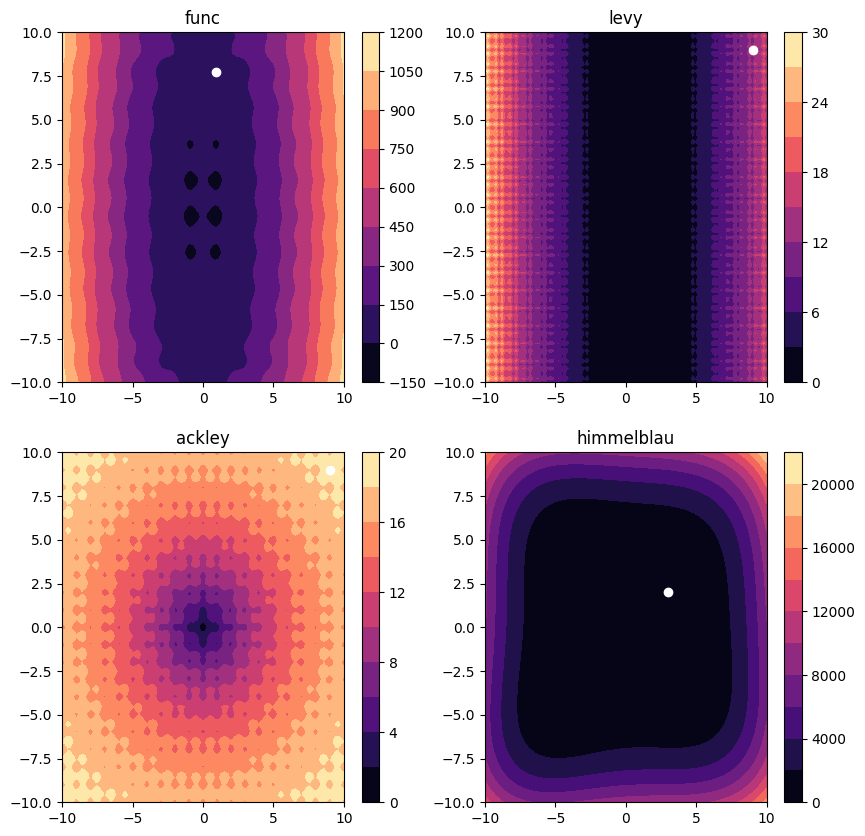

In [3]:
def gradient_descent(f, f_dev, x, step):
    while True:
        d = -(f_dev(x)/np.linalg.norm(f_dev(x)))
        x_k = x + step*d
        if f(x_k) <= f(x):
            x = x_k
        else:
            return x

point_func = gradient_descent(func, der_func, [9,9], 0.001)
point_levy = gradient_descent(levy, dev_levy, [9,9], 0.001)
point_himmelblau = gradient_descent(himmelblau, der_himmelblau, [9,9], 0.001)
point_ackley = gradient_descent(ackley, der_ackley, [9,9], 0.001)
plot(point_func, point_ackley, point_levy, point_himmelblau)

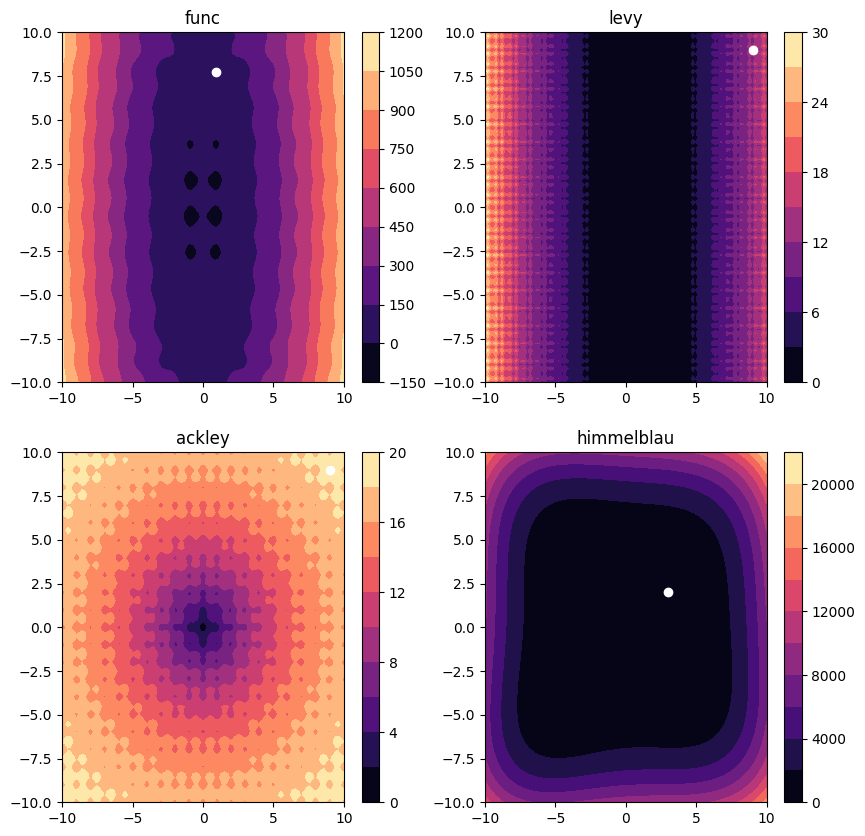

In [4]:
'''Adiciona um parâmetro dando mais força aos passos (Quanto maior a inclinação do
passos anteriores maior a força), em busca de uma convergência mais rápida'''
def momentum(f, f_dev, x, step, momen):
    v = np.zeros(len(x))
    while True:
        d = -(f_dev(x)/np.linalg.norm(f_dev(x)))
        v_k = momen*v + step*d
        x_k = x + v_k

        if f(x_k)<=f(x):
            x = x_k
            v = v_k
        else:
            return x

point_func = momentum(func, der_func, [9,9], 0.001, 0.01)
point_levy = momentum(levy, dev_levy, [9,9], 0.001, 0.01)
point_himmelblau = momentum(himmelblau, der_himmelblau, [9,9], 0.001, 0.01)
point_ackley = momentum(ackley, der_ackley, [9,9], 0.001, 0.01)
plot(point_func, point_ackley, point_levy, point_himmelblau)

O gradient com momentum anterior tem o problema de aumentar a força do momentum e acabar pulando mínimas globais ou locais. Nesterov_momentum busca antecipar o gradient do passo seguinte, o levando em consideração e evitando com que mínimas sejam puladas

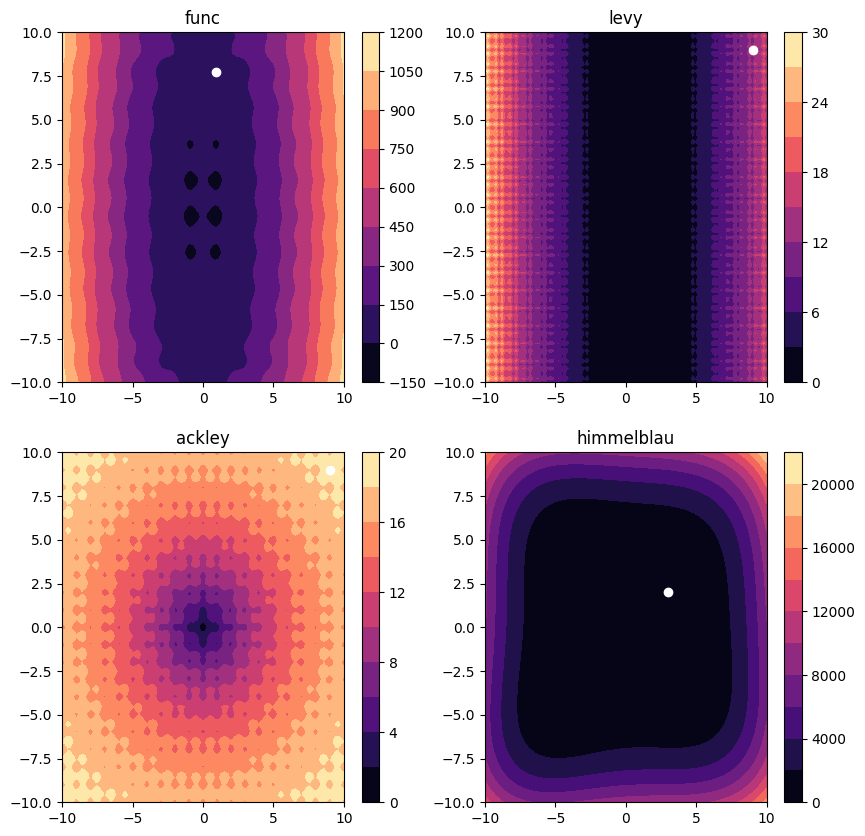

In [5]:
def Nesterov_momentum(f, f_dev, x, step, momen):
    v = np.zeros(len(x))
    while True:
        v_k = momen*v - step*(f_dev(x + momen*v))
        x_k = x + v_k
        if f(x_k)<f(x):
            x = x_k
            v = v_k
        else:
            return x

point_func = Nesterov_momentum(func, der_func, [9,9], 0.001, 0.01)
point_levy = Nesterov_momentum(levy, dev_levy, [9,9], 0.001, 0.01)
point_himmelblau = Nesterov_momentum(himmelblau, der_himmelblau, [9,9], 0.001, 0.01)
point_ackley = Nesterov_momentum(ackley, der_ackley, [9,9], 0.001, 0.01)
plot(point_func, point_ackley, point_levy, point_himmelblau)

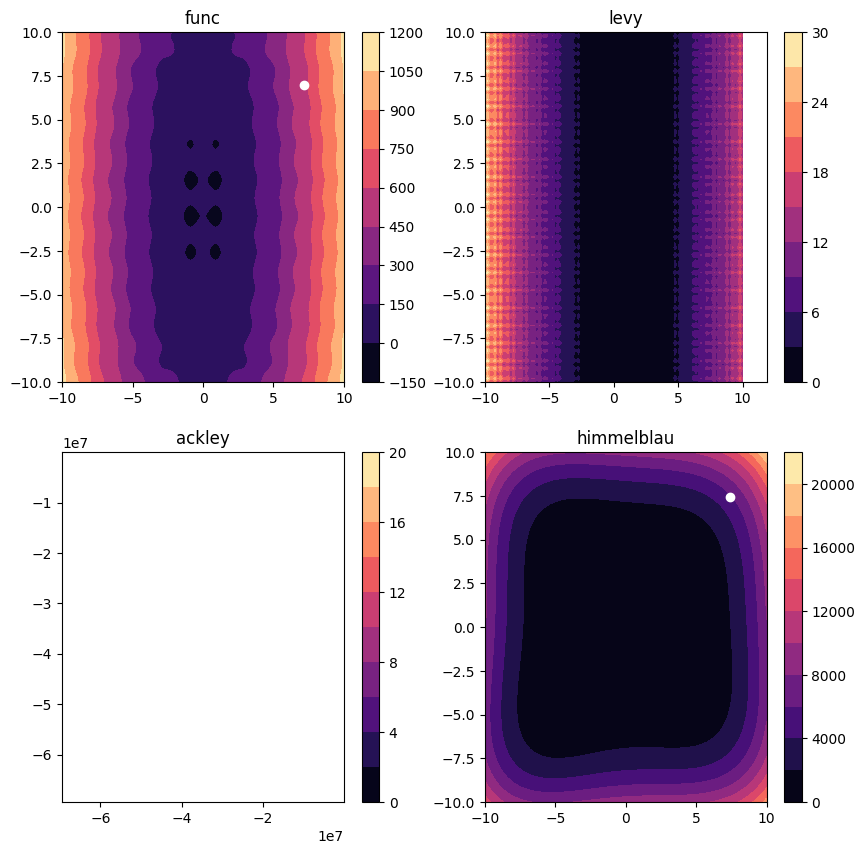

In [6]:
'''Ada_grad irá no passo k usar todas as derivadas calculadas até então para ajudar
no calculo do passo, dessa forma se torna um modelo menos dependente do parâmetro 
"step" como os outros já apresentado, outra diferença é que cada coordenada é calculada
de forma individual'''
def ada_grad(der_f, x, step):
    # Manter todas as derivadas parciais já calculadas
    gradients = np.array([0]*len(x)*2).reshape(len(x), 2)
    gradients[:,-1] = der_f(x)
    e = 1e-8
    norm = np.inf
    k=0
    while norm > 0.01 and k<1e6:
        x_pass = x.copy()
        s = np.sqrt(gradients[:,0] + gradients[:,1]**2)
        x -= step*der_f(x)/(e + s)
        gradients = np.append(np.sum(gradients**2, axis=1).reshape(len(x),1), der_f(x).reshape(len(x), 1), axis=1)
        norm = np.linalg.norm([np.array(x)-np.array(x_pass)])
        k+=1
    return x

point_func = ada_grad(der_func, [9,9], 1)
point_levy = ada_grad(dev_levy, [9,9], 1)
point_himmelblau = ada_grad(der_himmelblau, [9,9], 1)
point_ackley = ada_grad(der_ackley, [9,9], 1)
plot(point_func, point_ackley, point_levy, point_himmelblau)


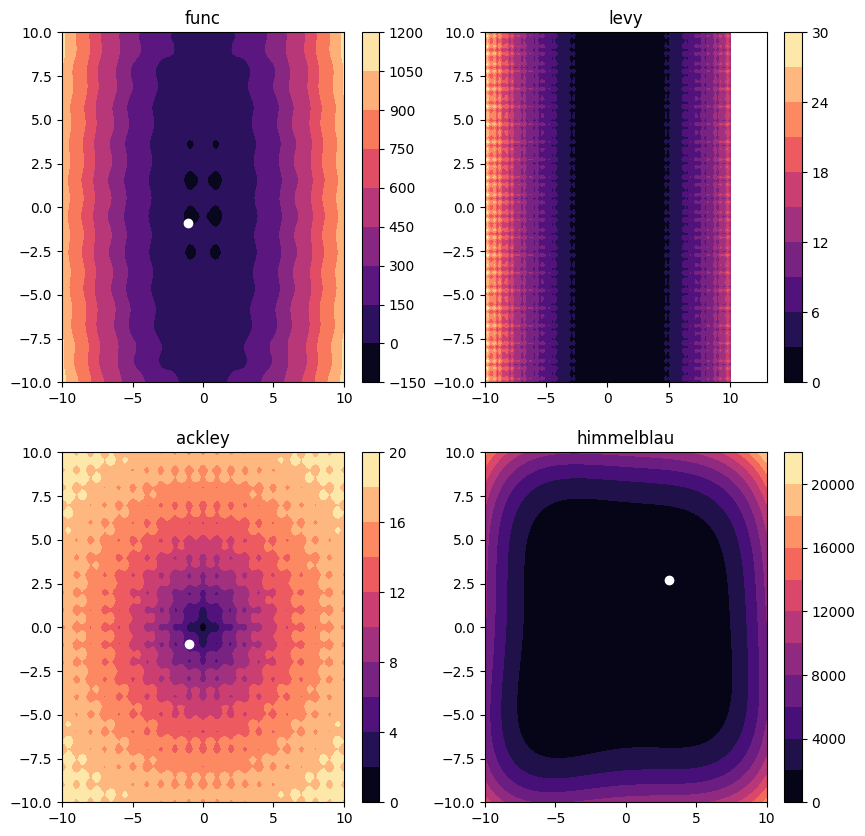

In [8]:
'''Esse algo é uma adaptação do usado anteriormente, aquele tinha uma característica de reduzir
o "step" a cada iteração, agora é usado o elemento s_k que permite em alguns elementos o step
crescer em relação ao anterior(isso irá acontecer se o gradient do último passo for próximo a 0)'''
def RMSprop(der_f, x, step, a=0.9):
    e = 1e-8
    norm = np.inf
    s=1
    k=0
    while norm > 0.1 and k<1e6:
        x_pass = x.copy()
        s_k = a*s + (1-a)*(der_f(x)**2)
        x = x - (step/(e + np.sqrt(s_k)))*der_f(x)
        norm = np.linalg.norm([np.array(x)-np.array(x_pass)])
        s = s_k
        k+=1
    return x

point_func = RMSprop(der_func, [9,9], 1)
point_levy = RMSprop(dev_levy, [9,9], 1)
point_himmelblau = RMSprop(der_himmelblau, [9,9], 1)
point_ackley = RMSprop(der_ackley, [9,9], 1)
plot(point_func, point_ackley, point_levy, point_himmelblau)